# <span > Concessão de cartões de crédito </span>

# Entendimento do negócio

Este é um problema de concessão de cartões de crédito, publicado no [Kaggle](https://www.kaggle.com/), uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction). A base utilizada foi modificada e fornecida pela EBAC (https://ebaconline.com.br/)
  
Essa é uma base de proponentes de cartão de crédito, nosso objetivo é construir um modelo preditivo para identificar o risco de inadimplência (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

# Entendimento dos dados

#### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|





# Carregando os pacotes e os dados


In [1]:
!pip install numpy==1.26
!pip install seaborn==0.13
!pip install pandas==2.0.3


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 61.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-nlp 0.12.1 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.0 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 16.1.0 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is

#### Escolha de cores e paletas para os gráficos

In [2]:
color_palette = ['#023047', '#e85d04', '#0077b6', '#0096c7', '#ff9c33']
sns.set_palette(sns.color_palette(color_palette))

#### Carregando os dados


In [3]:
df = pd.read_csv('/kaggle/input/perfil-clientes-concessao-de-credito/demo01.csv', na_values='NaN')
print ("Número de linhas e colunas da tabela: {}".format(df.shape))

df.head(1)

Número de linhas e colunas da tabela: (16650, 16)


sexo posse_de_veiculo posse_de_imovel  qtd_filhos tipo_renda  \
0    M                Y               Y           0    Working   

                        educacao estado_civil    tipo_residencia      idade  \
0  Secondary / secondary special      Married  House / apartment  58.832877   

   tempo_emprego  possui_celular  possui_fone_comercial  possui_fone  \
0       3.106849               1                      0            0   

   possui_email  qt_pessoas_residencia    mau  
0             0                    2.0  False

#### Separando os grupos


In [4]:
df_adimplentes=df[df['mau']==False]


In [5]:
df_inadimplentes=df[df['mau']==True]


In [6]:
df_adimplentes.head(1)

sexo posse_de_veiculo posse_de_imovel  qtd_filhos tipo_renda  \
0    M                Y               Y           0    Working   

                        educacao estado_civil    tipo_residencia      idade  \
0  Secondary / secondary special      Married  House / apartment  58.832877   

   tempo_emprego  possui_celular  possui_fone_comercial  possui_fone  \
0       3.106849               1                      0            0   

   possui_email  qt_pessoas_residencia    mau  
0             0                    2.0  False

In [7]:
df_inadimplentes.head(1)

sexo posse_de_veiculo posse_de_imovel  qtd_filhos tipo_renda  \
284    F                N               N           0    Working   

                          educacao estado_civil    tipo_residencia      idade  \
284  Secondary / secondary special      Married  House / apartment  52.890411   

     tempo_emprego  possui_celular  possui_fone_comercial  possui_fone  \
284       9.030137               1                      1            0   

     possui_email  qt_pessoas_residencia   mau  
284             0                    2.0  True

In [8]:
print(df['mau'].value_counts())


mau
False    16260
True       390
Name: count, dtype: int64


# Entendendo os dados

### Descobrindo a distribuição dos clientes

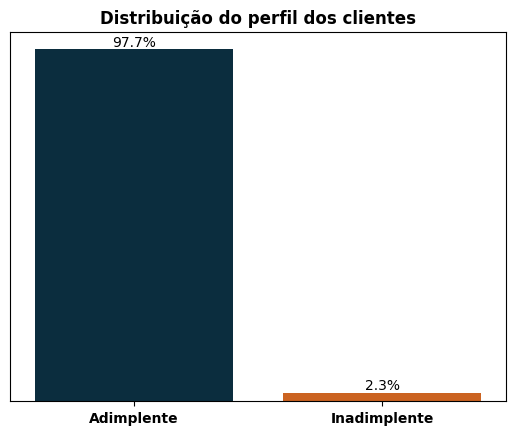

In [9]:
ax = sns.countplot(data=df, x='mau', hue='mau', legend=False)
ax.set_title('Distribuição do perfil dos clientes', fontweight='bold')

tick_positions = [0, 1]
ax.set_xticks(tick_positions)

ax.set_xticklabels(['Adimplente', 'Inadimplente'], fontweight='bold')
ax.set_xlabel('')
ax.grid(False)
ax.yaxis.set_visible(False)

total = len(df)
counts = [count.get_height() for count in ax.patches]
percentages = [(count / total) * 100 for count in counts]

for count, percentage in zip(ax.patches, percentages):
    x = count.get_x() + count.get_width() / 2
    y = count.get_height()
    ax.annotate(f"{percentage:.1f}%", (x, y), ha='center', va='bottom')
plt.show()

## Avaliando a presença de dados nulos

In [10]:
df.isna().any()

sexo                     False
posse_de_veiculo         False
posse_de_imovel          False
qtd_filhos               False
tipo_renda               False
educacao                 False
estado_civil             False
tipo_residencia          False
idade                    False
tempo_emprego            False
possui_celular           False
possui_fone_comercial    False
possui_fone              False
possui_email             False
qt_pessoas_residencia    False
mau                      False
dtype: bool

## Identificando os tipos das variáveis para visualização dos dados

In [11]:
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [12]:
df.drop(['possui_celular'], axis=1).select_dtypes('number').corr()


qtd_filhos     idade  tempo_emprego  \
qtd_filhos               1.000000 -0.370128       0.236177   
idade                   -0.370128  1.000000      -0.615147   
tempo_emprego            0.236177 -0.615147       1.000000   
possui_fone_comercial    0.050690 -0.183015       0.242092   
possui_fone             -0.016628  0.020359       0.013084   
possui_email             0.027098 -0.101443       0.081818   
qt_pessoas_residencia    0.890381 -0.342012       0.229619   

                       possui_fone_comercial  possui_fone  possui_email  \
qtd_filhos                          0.050690    -0.016628      0.027098   
idade                              -0.183015     0.020359     -0.101443   
tempo_emprego                       0.242092     0.013084      0.081818   
possui_fone_comercial               1.000000     0.315130     -0.038060   
possui_fone                         0.315130     1.000000      0.019609   
possui_email                       -0.038060     0.019609      1.000000   
qt_pessoas_residencia               0.067520    -0.002205      0.028584   

                       qt_pessoas_residencia  
qtd_filhos                          0.890381  
idade                              -0.342012  
tempo_emprego                       0.229619  
possui_fone_comercial               0.067520  
possui_fone                        -0.002205  
possui_email                        0.028584  
qt_pessoas_residencia               1.000000

In [13]:
df.select_dtypes('number').describe().transpose()


count        mean         std          min  \
qtd_filhos             16650.0    0.433153    0.739395     0.000000   
idade                  16650.0   44.319513   11.228837    22.030137   
tempo_emprego          16650.0 -161.416446  376.843912 -1000.665753   
possui_celular         16650.0    1.000000    0.000000     1.000000   
possui_fone_comercial  16650.0    0.225225    0.417743     0.000000   
possui_fone            16650.0    0.295676    0.456360     0.000000   
possui_email           16650.0    0.088889    0.284592     0.000000   
qt_pessoas_residencia  16650.0    2.211892    0.903755     1.000000   

                             25%        50%        75%        max  
qtd_filhos              0.000000   0.000000   1.000000  14.000000  
idade                  34.873973  43.493151  53.410959  68.909589  
tempo_emprego           1.183562   4.691781   9.088356  42.906849  
possui_celular          1.000000   1.000000   1.000000   1.000000  
possui_fone_comercial   0.000000   0.000000   0.000000   1.000000  
possui_fone             0.000000   0.000000   1.000000   1.000000  
possui_email            0.000000   0.000000   0.000000   1.000000  
qt_pessoas_residencia   2.000000   2.000000   3.000000  15.000000

Tabela de correlação entre as variáveis numéricas para facilitar a exploração dos dados

In [14]:
df.select_dtypes('object').describe().transpose()


count unique                            top   freq
sexo              16650      2                              F  11201
posse_de_veiculo  16650      2                              N  10178
posse_de_imovel   16650      2                              Y  11176
tipo_renda        16650      5                        Working   8565
educacao          16650      5  Secondary / secondary special  11245
estado_civil      16650      5                        Married  11680
tipo_residencia   16650      6              House / apartment  14974

# Visualização dos dados categóricos/binários


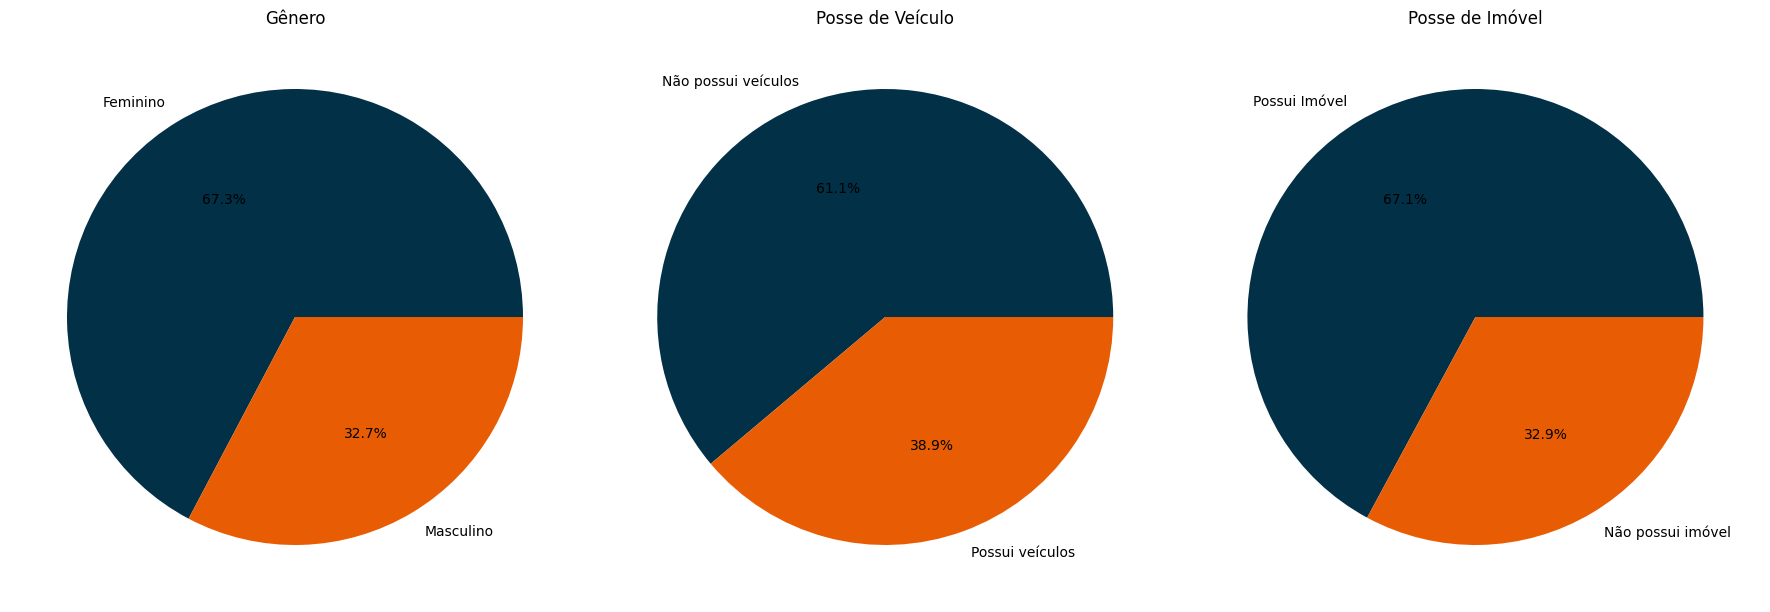

In [15]:
titles = ['Gênero', 'Posse de Veículo', 'Posse de Imóvel']
columns = ['sexo', 'posse_de_veiculo', 'posse_de_imovel']
labels = [
    ['Feminino', 'Masculino'],
    ['Não possui veículos', 'Possui veículos'],
    ['Possui Imóvel', 'Não possui imóvel'],
    ['Possui', 'Não possui']
]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i in range(3):
    counts = df[columns[i]].value_counts()
    axs[i].pie(counts, labels=labels[i], autopct='%1.1f%%')
    axs[i].set_title(titles[i])

plt.tight_layout()

plt.show()

A maioria dos clientes é do sexo feminino, não possui veículos e possuui imóvel

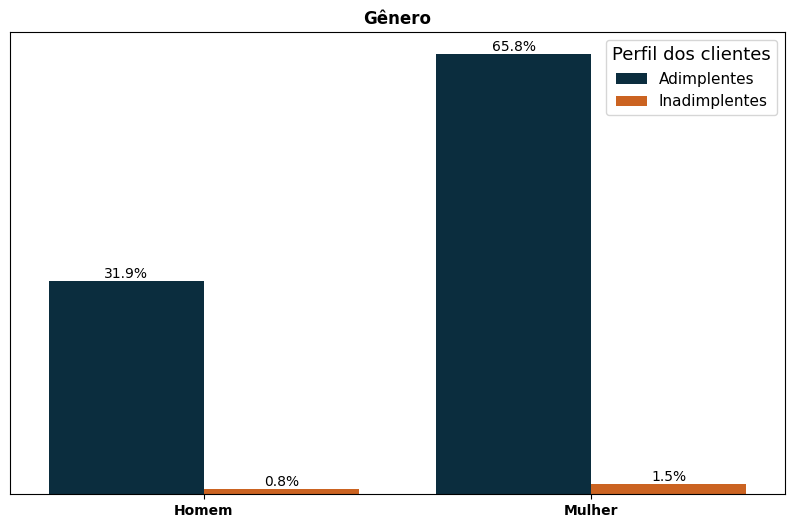

In [16]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df, x='sexo', hue='mau')
ax.set_title('Gênero', fontweight='bold')

tick_positions = [0, 1]
ax.set_xticks(tick_positions)
ax.set_xticklabels(['Homem', 'Mulher'], fontweight='bold')
ax.set_xlabel('')
ax.grid(False)
ax.yaxis.set_visible(False)

leg_labels = ['Adimplentes', 'Inadimplentes']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, leg_labels, title='Perfil dos clientes', title_fontsize='13', fontsize='11', loc='upper right')

total = len(df)
counts = [count.get_height() for count in ax.patches]
percentages = [(count / total) * 100 for count in counts]

for count, percentage in zip(ax.patches, percentages):
    if percentage > 0:
        x = count.get_x() + count.get_width() / 2
        y = count.get_height()
        ax.annotate(f"{percentage:.1f}%", (x, y), ha='center', va='bottom')


plt.show()

A maior parte dos clientes é do sexo feminino.
O sexo não pareceu ser determinante para a determinação de adimplência do cliente

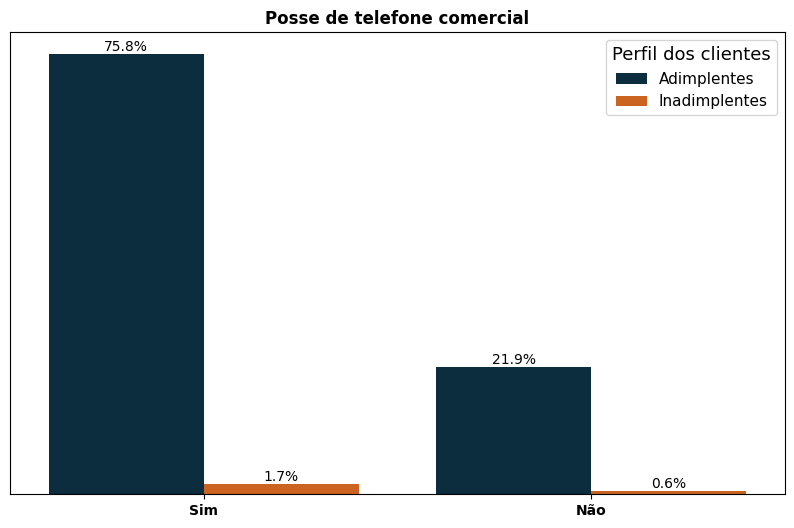

In [17]:
plt.figure(figsize=(10, 6))


ax = sns.countplot(data=df, x='possui_fone_comercial', hue='mau')
ax.set_title('Posse de telefone comercial', fontweight='bold')

tick_positions = [0, 1]
ax.set_xticks(tick_positions)
ax.set_xticklabels(['Sim', 'Não'], fontweight='bold')
ax.set_xlabel('')
ax.grid(False)
ax.yaxis.set_visible(False)

leg_labels = ['Adimplentes', 'Inadimplentes']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, leg_labels, title='Perfil dos clientes', title_fontsize='13', fontsize='11', loc='upper right')

total = len(df)
counts = [count.get_height() for count in ax.patches]
percentages = [(count / total) * 100 for count in counts]

for count, percentage in zip(ax.patches, percentages):
    if percentage > 0:
        x = count.get_x() + count.get_width() / 2
        y = count.get_height()
        ax.annotate(f"{percentage:.1f}%", (x, y), ha='center', va='bottom')

plt.show()

A maior parte dos clientes possui telefone comercial.
A posse de telefone comercial não pareceu ser determinante para a determinação de adimplência do cliente

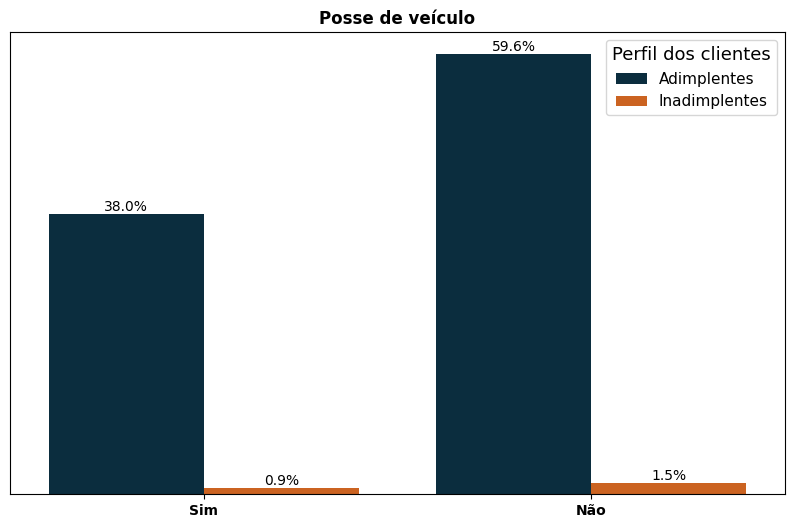

In [18]:
plt.figure(figsize=(10, 6))


ax = sns.countplot(data=df, x='posse_de_veiculo', hue='mau')
ax.set_title('Posse de veículo', fontweight='bold')

tick_positions = [0, 1]
ax.set_xticks(tick_positions)
ax.set_xticklabels(['Sim', 'Não'], fontweight='bold')
ax.set_xlabel('')
ax.grid(False)
ax.yaxis.set_visible(False)

leg_labels = ['Adimplentes', 'Inadimplentes']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, leg_labels, title='Perfil dos clientes', title_fontsize='13', fontsize='11', loc='upper right')

total = len(df)
counts = [count.get_height() for count in ax.patches]
percentages = [(count / total) * 100 for count in counts]

for count, percentage in zip(ax.patches, percentages):
    if percentage > 0:
        x = count.get_x() + count.get_width() / 2
        y = count.get_height()
        ax.annotate(f"{percentage:.1f}%", (x, y), ha='center', va='bottom')

plt.show()

A maior parte dos clientes não possui veículo.
A posse de veículo não pareceu ser determinante para a determinação de adimplência do cliente

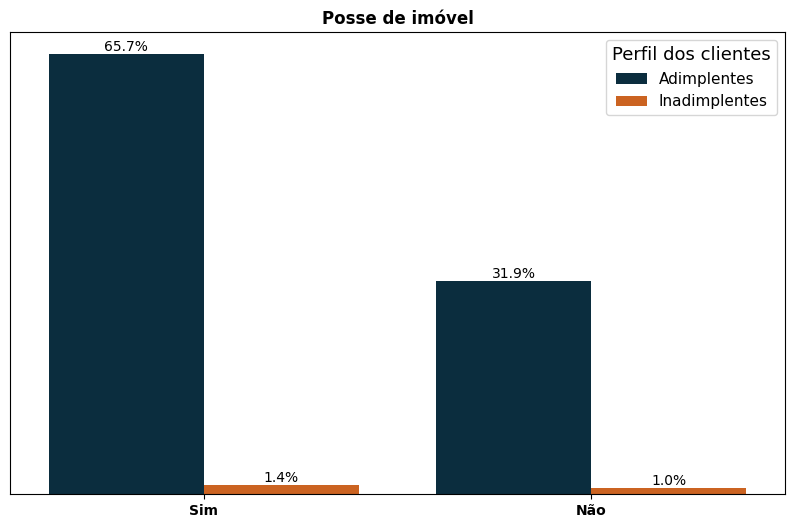

In [19]:
plt.figure(figsize=(10, 6))


ax = sns.countplot(data=df, x='posse_de_imovel', hue='mau')
ax.set_title('Posse de imóvel', fontweight='bold')

tick_positions = [0, 1]
ax.set_xticks(tick_positions)
ax.set_xticklabels(['Sim', 'Não'], fontweight='bold')
ax.set_xlabel('')
ax.grid(False)
ax.yaxis.set_visible(False)

leg_labels = ['Adimplentes', 'Inadimplentes']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, leg_labels, title='Perfil dos clientes', title_fontsize='13', fontsize='11', loc='upper right')

total = len(df)
counts = [count.get_height() for count in ax.patches]
percentages = [(count / total) * 100 for count in counts]

for count, percentage in zip(ax.patches, percentages):
    if percentage > 0:
        x = count.get_x() + count.get_width() / 2
        y = count.get_height()
        ax.annotate(f"{percentage:.1f}%", (x, y), ha='center', va='bottom')

plt.show()

A maior parte dos clientes possui imóvel.
A posse do imóvel não pareceu ser determinante para a determinação de adimplência do cliente

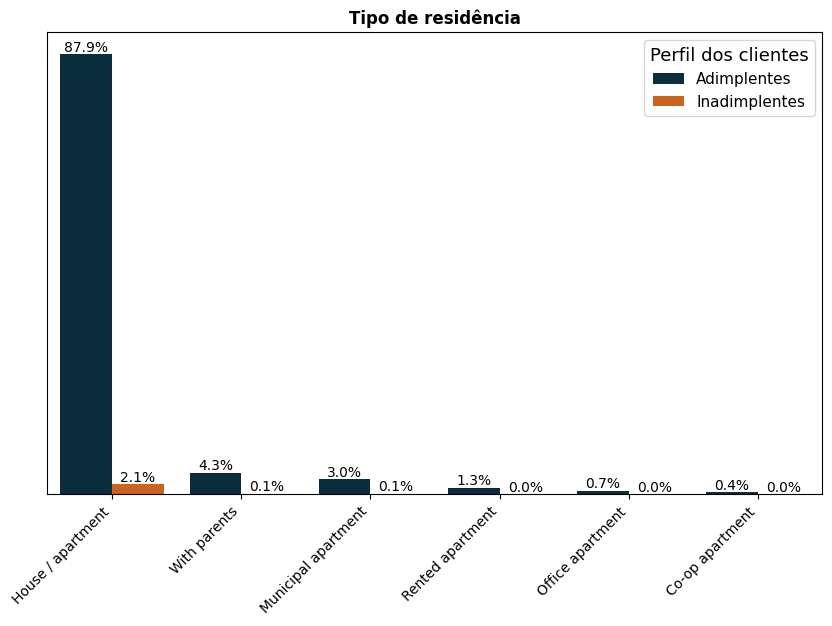

In [20]:
plt.figure(figsize=(10, 6))

category_counts = df['tipo_residencia'].value_counts()
ordered_categories = category_counts.index.tolist()

ax = sns.countplot(data=df, x='tipo_residencia', hue='mau', order=ordered_categories)
ax.set_title('Tipo de residência', fontweight='bold')
plt.xticks(rotation=45, ha='right')

ax.set_xlabel('')
ax.grid(False)
ax.yaxis.set_visible(False)

leg_labels = ['Adimplentes', 'Inadimplentes']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, leg_labels, title='Perfil dos clientes', title_fontsize='13', fontsize='11', loc='upper right')

total = len(df)
counts = [count.get_height() for count in ax.patches]
percentages = [(count / total) * 100 for count in counts]

for count, percentage in zip(ax.patches, percentages):
    if percentage > 0:
        x = count.get_x() + count.get_width() / 2
        y = count.get_height()
        ax.annotate(f"{percentage:.1f}%", (x, y), ha='center', va='bottom')

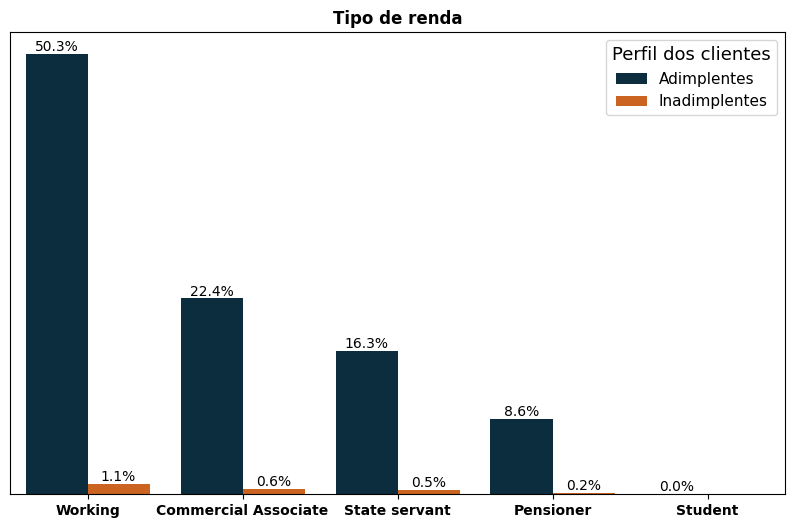

In [21]:
plt.figure(figsize=(10, 6))

category_counts = df['tipo_renda'].value_counts()
ordered_categories = category_counts.index.tolist()

ax = sns.countplot(data=df, x='tipo_renda', hue='mau', order=ordered_categories)
ax.set_title('Tipo de renda', fontweight='bold')

tick_positions = [0, 1, 2, 3, 4]
ax.set_xticks(tick_positions)
ax.set_xticklabels(['Working', 'Commercial Associate', 'State servant', 'Pensioner', 'Student'], fontweight='bold')
ax.set_xlabel('')
ax.grid(False)
ax.yaxis.set_visible(False)

leg_labels = ['Adimplentes', 'Inadimplentes']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, leg_labels, title='Perfil dos clientes', title_fontsize='13', fontsize='11', loc='upper right')

total = len(df)
counts = [count.get_height() for count in ax.patches]
percentages = [(count / total) * 100 for count in counts]

for count, percentage in zip(ax.patches, percentages):
    if percentage > 0:
        x = count.get_x() + count.get_width() / 2
        y = count.get_height()
        ax.annotate(f"{percentage:.1f}%", (x, y), ha='center', va='bottom')

plt.show()

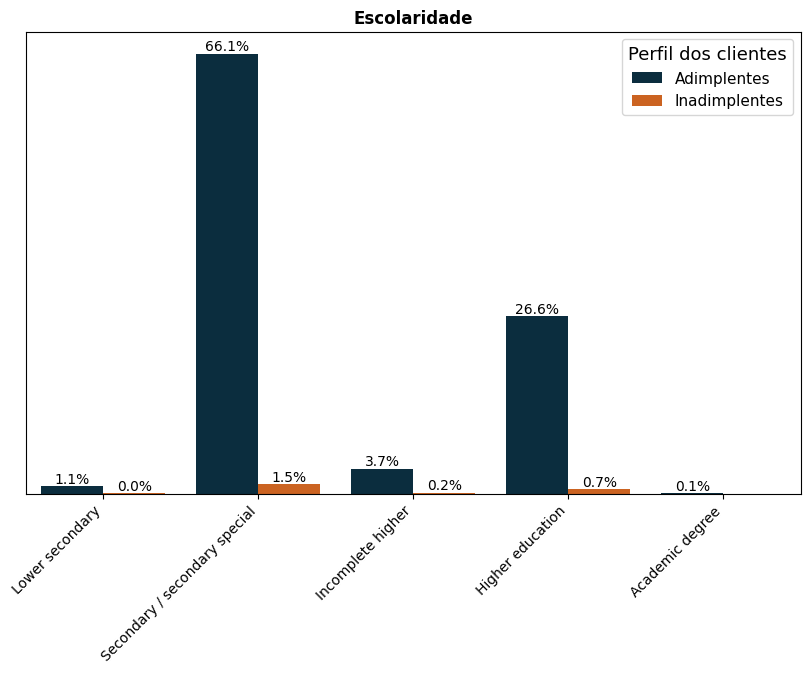

In [22]:
plt.figure(figsize=(10, 6))

ordem = ['Lower secondary', 'Secondary / secondary special','Incomplete higher', 'Higher education', 'Academic degree']

ax = sns.countplot(data=df, x='educacao', hue='mau', order=ordem)
ax.set_title('Escolaridade', fontweight='bold')
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('')
ax.grid(False)
ax.yaxis.set_visible(False)

leg_labels = ['Adimplentes', 'Inadimplentes']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, leg_labels, title='Perfil dos clientes', title_fontsize='13', fontsize='11', loc='upper right')

total = len(df)
counts = [count.get_height() for count in ax.patches]
percentages = [(count / total) * 100 for count in counts]

for count, percentage in zip(ax.patches, percentages):
    if percentage > 0:
        x = count.get_x() + count.get_width() / 2
        y = count.get_height()
        ax.annotate(f"{percentage:.1f}%", (x, y), ha='center', va='bottom')

plt.show()

A maior parte dos clientes do banco possuem escolaridade de nível secundário, mas isso não pareceu influenciar a determinação de adimplência dos clientes

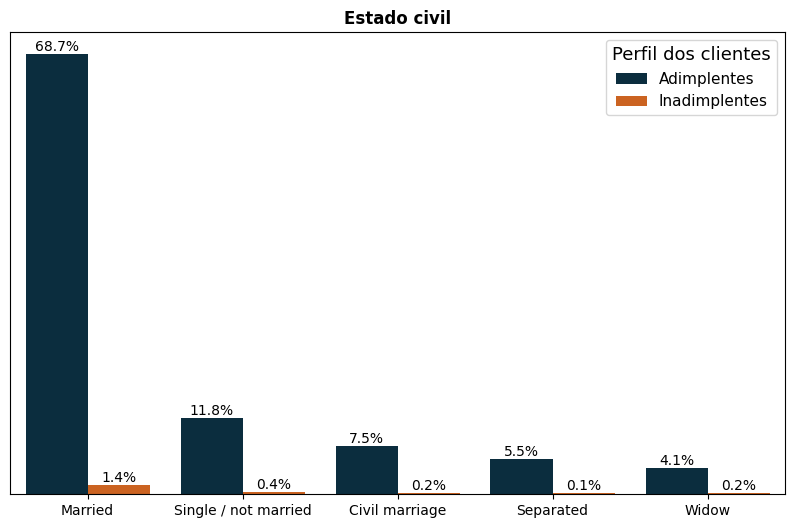

In [23]:
plt.figure(figsize=(10, 6))

category_counts = df['estado_civil'].value_counts()
ordered_categories = category_counts.index.tolist()

ax = sns.countplot(data=df, x='estado_civil', hue='mau', order=ordered_categories)
ax.set_title('Estado civil', fontweight='bold')

ax.set_xlabel('')
ax.grid(False)
ax.yaxis.set_visible(False)

leg_labels = ['Adimplentes', 'Inadimplentes']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, leg_labels, title='Perfil dos clientes', title_fontsize='13', fontsize='11', loc='upper right')

total = len(df)
counts = [count.get_height() for count in ax.patches]
percentages = [(count / total) * 100 for count in counts]

for count, percentage in zip(ax.patches, percentages):
    if percentage > 0:
        x = count.get_x() + count.get_width() / 2
        y = count.get_height()
        ax.annotate(f"{percentage:.1f}%", (x, y), ha='center', va='bottom')

# Visualização dos dados numéricos

<Figure size 640x480 with 0 Axes>

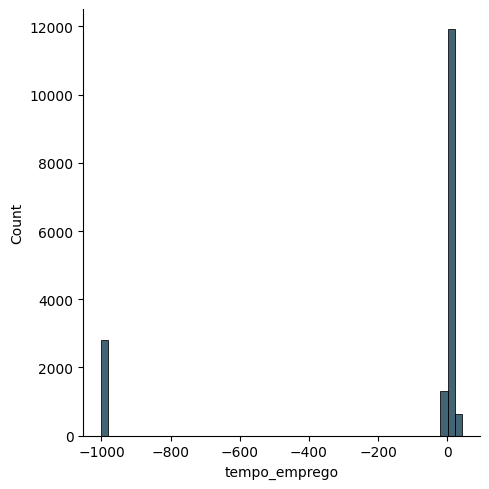

In [24]:
plt.clf()
var = "tempo_emprego"

sns.displot(df, x = var, bins = 50)
plt.show()

In [25]:
# Alterando valores de -1000 pra -2, para visualizar melhor no gráfico
var = "tempo_emprego"
df.loc[df[var]<0,var] = -2

<Figure size 640x480 with 0 Axes>

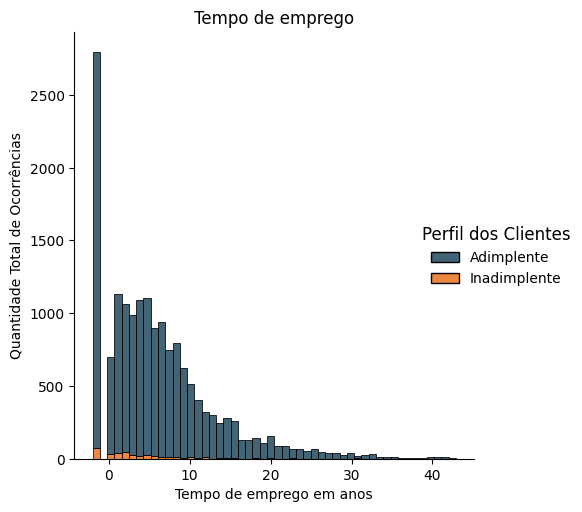

In [26]:
plt.clf()
var = "tempo_emprego"

f=sns.displot(data=df, x=var, stat='count', hue='mau', multiple='stack', bins=50)
legend = f._legend
legend.set_title('Perfil dos Clientes')
plt.setp(legend.get_title(), fontsize='12')

new_labels = ['Adimplente', 'Inadimplente']
for text, label in zip(legend.get_texts(), new_labels):
    text.set_text(label)
    
plt.title('Tempo de emprego')
plt.xlabel('Tempo de emprego em anos')
plt.ylabel('Quantidade Total de Ocorrências')

plt.show()

É possível observar que clientes com menos de 10 anos de emprego tendem a ter um perfil mais condizente com inadimplência, por outro lado, o número de inadimplentes é muito baixo entre os clientes com 20 anos ou mais de emprego

<Figure size 640x480 with 0 Axes>

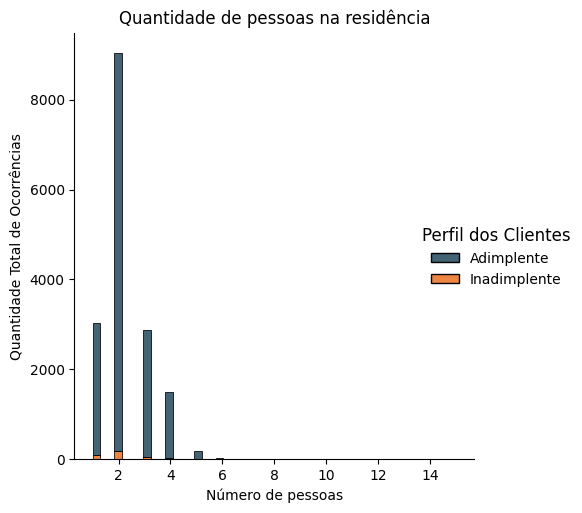

In [27]:
plt.clf()
var = "qt_pessoas_residencia"

f=sns.displot(data=df, x=var, stat='count', hue='mau', multiple='stack', bins=50)
legend = f._legend
legend.set_title('Perfil dos Clientes')
plt.setp(legend.get_title(), fontsize='12')

new_labels = ['Adimplente', 'Inadimplente']
for text, label in zip(legend.get_texts(), new_labels):
    text.set_text(label)
    
plt.title('Quantidade de pessoas na residência')
plt.xlabel('Número de pessoas')
plt.ylabel('Quantidade Total de Ocorrências')

plt.show()

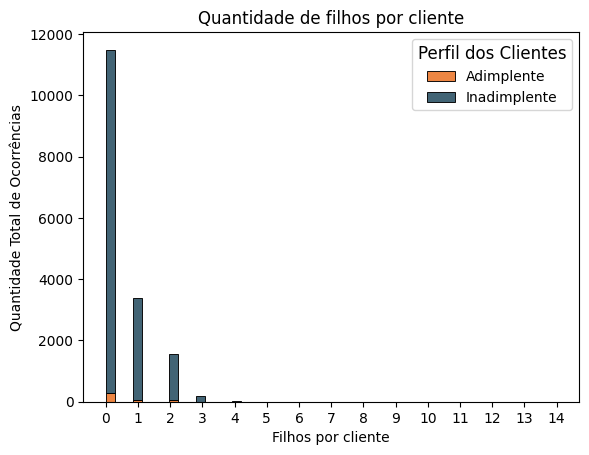

In [28]:
plt.clf()

f=sns.histplot(x='qtd_filhos', data=df, stat='count', hue='mau', multiple='stack', bins=50)

legend=f.legend(title='Perfil dos Clientes', labels=['Adimplente', 'Inadimplente'])
plt.setp(legend.get_title(), fontsize='12')
legend.legend_handles[0]._sizes = [1]
legend.legend_handles[1]._sizes = [1]

plt.title('Quantidade de filhos por cliente')
plt.xlabel('Filhos por cliente')
plt.ylabel('Quantidade Total de Ocorrências')

max_qtd_filhos = df['qtd_filhos'].max()
plt.xticks(range(0, max_qtd_filhos + 1))

plt.show()



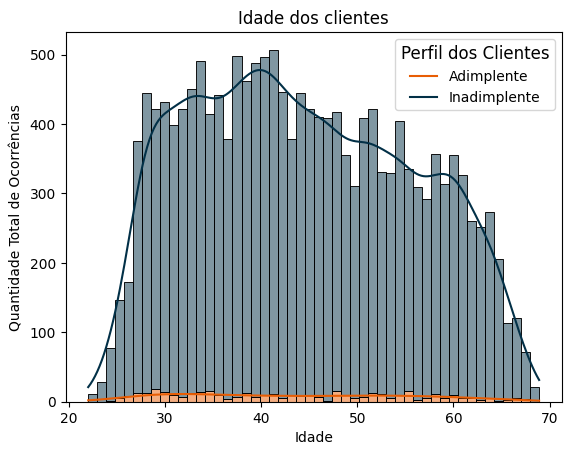

In [29]:
plt.clf()

f=sns.histplot(x='idade', data=df, stat='count', ax=None, hue='mau', multiple='stack', kde=True, bins=50)
legend=f.legend(title='Perfil dos Clientes', labels=['Adimplente', 'Inadimplente'])
plt.setp(legend.get_title(), fontsize='12')
legend.legend_handles[0]._sizes = [1]
legend.legend_handles[1]._sizes = [1]
plt.title('Idade dos clientes')
plt.xlabel('Idade')
plt.ylabel('Quantidade Total de Ocorrências')
plt.show()

plt.show()

# Visualização dos dados bivariados/relacionais




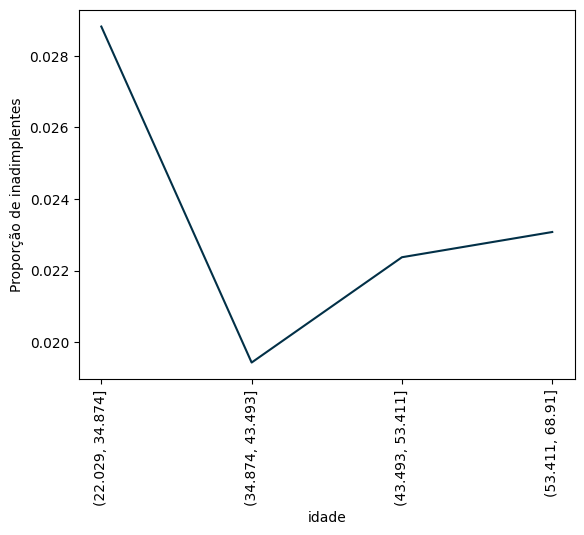

In [30]:
var = 'idade'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

A porporção de inadimplentes é maior na faixa etária de jovens adultos, tendo uma redução com idades intermediárias e voltando a aumentar (levemente) em idades mais avançadas. 
Pessoas jovens parecem ser mais inadimplentes


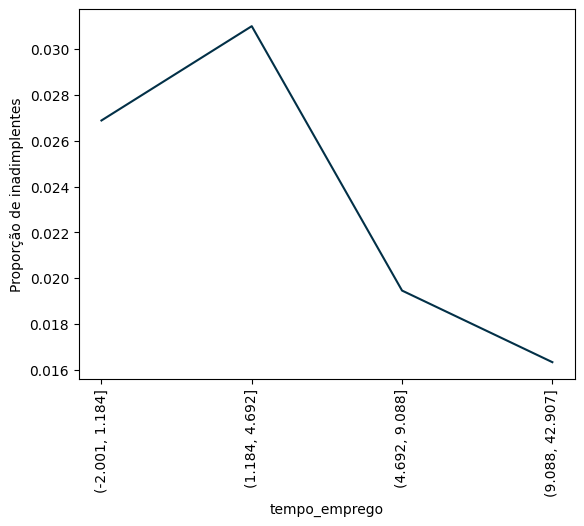

In [31]:
var = 'tempo_emprego'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

Aparentemente, o tempo de emprego tem uma correlação inversa com a inadimplência. Quanto maior o tempo de emprego, menor a porporção de inadimplentes

# Preparação dos dados

Os dados já estão pré-selecionados, construídos e integrados

In [32]:
metadata = pd.DataFrame(df.dtypes, columns = ['tipo'])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(df.groupby([var]).size())
    
metadata

tipo  n_categorias
sexo                    object             2
posse_de_veiculo        object             2
posse_de_imovel         object             2
qtd_filhos               int64             8
tipo_renda              object             5
educacao                object             5
estado_civil            object             5
tipo_residencia         object             6
idade                  float64          5298
tempo_emprego          float64          3005
possui_celular           int64             1
possui_fone_comercial    int64             2
possui_fone              int64             2
possui_email             int64             2
qt_pessoas_residencia  float64             9
mau                       bool             2

### Transformamos as variáveis em dummy para possibilitar o uso do modelo de predição

In [33]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [34]:
for var in metadata[metadata['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

In [35]:
df

qtd_filhos      idade  tempo_emprego  possui_celular  \
0               0  58.832877       3.106849               1   
1               0  52.356164       8.358904               1   
2               0  52.356164       8.358904               1   
3               0  46.224658       2.106849               1   
4               0  29.230137       3.021918               1   
...           ...        ...            ...             ...   
16645           0  54.109589       9.884932               1   
16646           0  43.389041       7.380822               1   
16647           0  30.005479       9.800000               1   
16648           0  30.005479       9.800000               1   
16649           0  33.936986       3.630137               1   

       possui_fone_comercial  possui_fone  possui_email  \
0                          0            0             0   
1                          0            1             1   
2                          0            1             1   
3                          1            1             1   
4                          0            0             0   
...                      ...          ...           ...   
16645                      0            0             0   
16646                      1            1             0   
16647                      1            0             0   
16648                      1            0             0   
16649                      0            1             1   

       qt_pessoas_residencia    mau  sexo_M  ...  educacao_Lower secondary  \
0                        2.0  False    True  ...                     False   
1                        1.0  False   False  ...                     False   
2                        1.0  False   False  ...                     False   
3                        2.0  False    True  ...                     False   
4                        2.0  False   False  ...                     False   
...                      ...    ...     ...  ...                       ...   
16645                    2.0   True   False  ...                     False   
16646                    2.0   True   False  ...                     False   
16647                    2.0   True    True  ...                     False   
16648                    2.0   True    True  ...                     False   
16649                    2.0   True   False  ...                     False   

       estado_civil_Civil marriage  estado_civil_Separated  \
0                            False                   False   
1                            False                   False   
2                            False                   False   
3                            False                   False   
4                            False                   False   
...                            ...                     ...   
16645                         True                   False   
16646                        False                   False   
16647                        False                   False   
16648                        False                   False   
16649                        False                   False   

       estado_civil_Single / not married  estado_civil_Widow  \
0                                  False               False   
1                                   True               False   
2                                   True               False   
3                                  False               False   
4                                  False               False   
...                                  ...                 ...   
16645                              False               False   
16646                              False               False   
16647                              False               False   
16648                              False               False   
16649                              False               False   

       tipo_residencia_Co-op apartment  tipo_residencia_Municipal apartment  \
0          

# Modelagem

Utilizaremos a técnica de floresta aleatória (**random forest**), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados, relativamente fácil de se usar e que costuma produzir excelentes resultados para uma classificação como esta. 

#### Dividindo a base em treino e teste



In [36]:
# Tirando a v. resposta da base de treinamento
x = df.drop("mau",axis = 1)
y = df["mau"]

# Tirando ID da base de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [37]:
x_train

qtd_filhos      idade  tempo_emprego  possui_celular  \
3436            0  46.115068       9.772603               1   
389             2  34.936986       1.186301               1   
9294            0  36.249315       8.600000               1   
6271            0  26.756164       0.830137               1   
16220           0  37.830137       3.378082               1   
...           ...        ...            ...             ...   
5851            2  36.583562       1.553425               1   
8823            1  31.594521      13.471233               1   
6467            0  62.197260      -2.000000               1   
14524           0  31.164384       3.386301               1   
10131           2  42.821918       1.961644               1   

       possui_fone_comercial  possui_fone  possui_email  \
3436                       0            0             0   
389                        0            1             0   
9294                       1            1             0   
6271                       1            0             1   
16220                      1            1             0   
...                      ...          ...           ...   
5851                       0            0             0   
8823                       0            0             0   
6467                       0            0             0   
14524                      0            0             0   
10131                      0            0             0   

       qt_pessoas_residencia  sexo_M  posse_de_veiculo_Y  ...  \
3436                     2.0   False               False  ...   
389                      4.0   False               False  ...   
9294                     2.0    True               False  ...   
6271                     1.0   False                True  ...   
16220                    2.0   False               False  ...   
...                      ...     ...                 ...  ...   
5851                     4.0    True               False  ...   
8823                     3.0    True                True  ...   
6467                     2.0   False               False  ...   
14524                    1.0   False               False  ...   
10131                    4.0   False               False  ...   

       educacao_Lower secondary  estado_civil_Civil marriage  \
3436                      False                        False   
389                       False                        False   
9294                      False                        False   
6271                      False                        False   
16220                     False                         True   
...                         ...                          ...   
5851                      False                        False   
8823                      False                        False   
6467                      False                        False   
14524                     False                        False   
10131                     False                        False   

       estado_civil_Separated  estado_civil_Single / not married  \
3436                    False                              False   
389                     False                              False   
9294                    False                              False   
6271                    False                               True   
16220                   False                              False   
...                       ...                                ...   
5851                    False                              False   
8823                    False                              False   
6467                    False                              False   
14524                   False                               True   
10131                   False                              False   

       estado_civil_Widow  tipo_residencia_Co-op apartment  \
3436                False                            False   
389                 False                         

### Rodando o modelo
A função RandomForestClassifier gera a estrutura da floresta aleatória, e o parâmetro ```n_estimator``` define o número de árvores na floresta. Normalmente a acurácia do modelo tende a aumentar com o número de árvores


In [38]:
# Treinar uma Random Forest com 5 árvores

clf = RandomForestClassifier(n_estimators=99)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=99)

In [39]:
# Calculando a acuracia

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.91%


In [40]:
# Matriz de confusão

tab = pd.crosstab(index = y_pred, columns = y_test)

print(tab.iloc[1, 0] / (tab.iloc[1, 0] + tab.iloc[0, 0])) # por essa

print(tab.iloc[1, 1] / (tab.iloc[1, 1] + tab.iloc[0, 1])) # e por essa
tab

0.005154639175257732
0.25842696629213485


mau    False  True 
row_0              
False   4053     66
True      21     23

# Avaliação dos resultados
Neste caso, a nossa etapa final terminará com a acurácia.

Como um exemplo simples, considere que um cliente bom pagador deixa (em média) 5 '*dinheiros*' de lucro, e um mau pagador deixa (em média) 100 '*dinheiros*' de prejuízo.

de acordo com a matriz de confusão:

| Decisão   | lucro dos bons    | lucro dos maus | total  |
| --------- |:-----------------:|:--------------:| ------:|
| Aprovador | 4053 x 5          | 62 x (-100)    | 14.065 |
| Reprovar  |  27 x 5           | 21 x (-100)    | -1.965 |

Estariamos evitando, portanto, um prejuízo de -1.965  '*dinheiros*'  - o que na prática significa um aumento no lucro.


# Conclusão

Por meio da análise exploratória, identificamos que os fatores que mais parecem interferir na inadimplência dos clientes são idade e tempo de emprego.

Quanto menor a idade e o tempo de emprego, maior a proporção de clientes inadimplentes.

Com isso, treinamos um modelo de random forest, com acurácia de 97.86% para predição de clientes inadimplentes, evitando prejuízos com a concessão indevida de créditos para clientes com perfil inadimplentes. 
